In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import numpy as np
import random
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from helpers import (
    flatten, 
    get_theoretical_kappa, 
    noise_level, 
    signed_layout,
    get_borderless_fig, 
    draw_nodes,
    draw_edges
)
from exp_helpers import run_pipeline
from data_helpers import make_polarized_graphs_fewer_parameters
from tqdm import tqdm

In [3]:
random.seed(12345)
np.random.seed(12345)

In [4]:
sns.set(style="whitegrid")
plt.style.use('paper')

In [5]:
styles = dict(
    palette=sns.cubehelix_palette(3, light=0.8, start=0.5, rot=-.75),
    style='kappa',
    markers=True,

)

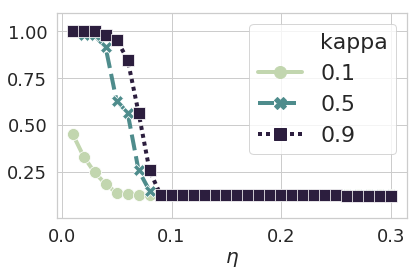

In [6]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))

avg_df = perf_df[['MAP', 'eta', 'kappa', 'noisy_edge_ratio']].groupby(['eta', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='eta', y='MAP', hue='kappa', data=avg_df, ax=ax, **styles
)

lp.set(
    ylim=(0, 1.1),
    xticks=[0.0, 0.1, 0.2, 0.3],
    yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel='',
    
)
l = lp.legend()

fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta.pdf')

# different number of outliers

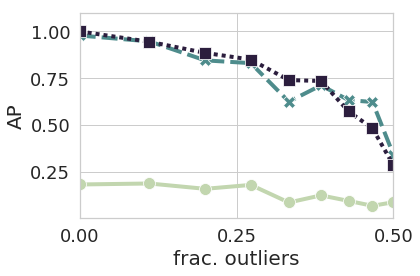

In [7]:
perf_df = pd.read_csv('outputs/effect_of_outlier_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
n_community_nodes = 320
perf_df['frac_nn'] = perf_df['nn'] / (perf_df['nn'] + n_community_nodes)

avg_df = perf_df[['MAP', 'frac_nn', 'kappa', 'edge_noise_level']].groupby(['frac_nn', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='frac_nn', y='MAP', hue='kappa', data=avg_df, ax=ax,
    legend=False,
    **styles
)
ax.set_xlabel('frac. outliers')
lp.set(
    xlim=(0, 0.5),
    ylim=(0, 1.1),
    xticks=[0.0, 0.25, 0.5],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='AP'
)
fig.tight_layout()
fig.savefig('figs/synthetic_experiment/effect_of_outlier.pdf')

# different seed size

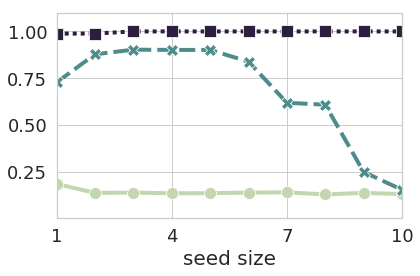

In [8]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))

avg_df = perf_df[['MAP', 'seed_size', 'kappa', 'min_beta', 'ground_truth_beta', 'edge_noise_level']].groupby(['seed_size', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='seed_size', y='MAP', hue='kappa', data=avg_df, ax=ax,
    legend=False,    
    **styles
)
lp.set(
    xlim=(1, 10),
    ylim=(0, 1.1),
    xticks=[1, 4, 7, 10],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='',
    xlabel='seed size')
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_seed.pdf')

# plot on ratio $\beta(C_1, C_2 ) / \beta(C_1^*, C_2^*)$

# effect of $\eta$

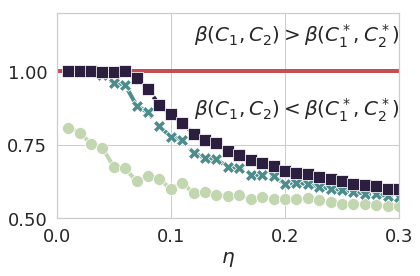

In [9]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']

avg_df = perf_df[['beta_ratio', 'eta', 'kappa']].groupby(['eta', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='eta', y='beta_ratio', hue='kappa', data=avg_df, ax=ax, 
    legend=False,
    **styles
)

lp.set(
    ylim=(0.5, 1.2),
    xlim=(0, 0.3),
    xticks=[0.0, 0.1, 0.2, 0.3],
    yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel='',
    
)
ax.text(0.12, 1.1, r'$\beta(C_1, C_2) > \beta(C_1^*, C_2^*)$', fontsize=20)
ax.text(0.12, 0.85, r'$\beta(C_1, C_2) < \beta(C_1^*, C_2^*)$', fontsize=20)
ax.hlines(1, 0, 0.3, colors='r')
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta_beta_ratio.pdf')

# effect of outlier size

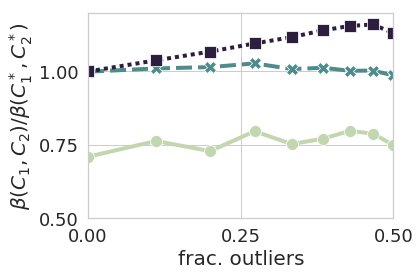

In [10]:
perf_df = pd.read_csv('outputs/effect_of_outlier_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']
n_community_nodes = 320
perf_df['frac_nn'] = perf_df['nn'] / (perf_df['nn'] + n_community_nodes)

avg_df = perf_df[['beta_ratio', 'frac_nn', 'kappa']].groupby(['frac_nn', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='frac_nn', y='beta_ratio', hue='kappa', data=avg_df, ax=ax,
    legend=False,
    **styles
)
ax.set_xlabel('frac. outliers')
lp.set(
    xlim=(0, 0.5),
    ylim=(0.5, 1.2),
    xticks=[0.0, 0.25, 0.5],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel=r'$\beta(C_1, C_2) / \beta(C_1^*, C_2^*)$'
)
fig.tight_layout()
fig.savefig('figs/synthetic_experiment/effect_of_outlier_beta_ratio.pdf')

# effect of seed size

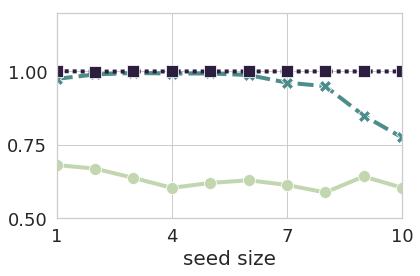

In [11]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']

avg_df = perf_df[['seed_size', 'kappa', 'beta_ratio']].groupby(['seed_size', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='seed_size', y='beta_ratio', hue='kappa', data=avg_df, ax=ax,
    legend=False,
    **styles
)
lp.set(
    xlim=(1, 10),
    ylim=(0.5, 1.2),
    xticks=[1, 4, 7, 10],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='',
    xlabel='seed size'
)
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_seed_beta_ratio.pdf')


# plot on solution size

# effect of $\eta$

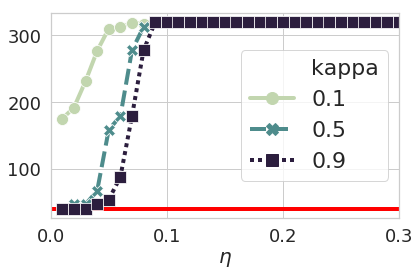

In [12]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['solution_size'] = (perf_df['C1_size'] + perf_df['C2_size'])

avg_df = perf_df[['solution_size', 'eta', 'kappa']].groupby(['eta', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='eta', y='solution_size', hue='kappa', data=avg_df, ax=ax, 
    legend='full',
    **styles
)

lp.set(
    #  ylim=(0.5, 1.2),
    xlim=(0, 0.3),
    xticks=[0.0, 0.1, 0.2, 0.3],
    # yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel='',    
    
)
ax.hlines(40, 0, 0.3, colors='red')
ax.legend(loc='center right')
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta_solution_size.pdf')

# effect of outlier size

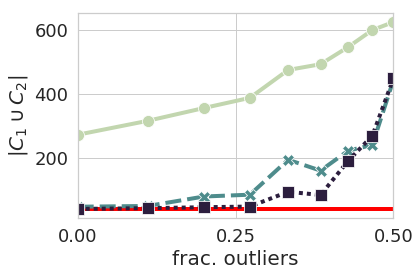

In [13]:
perf_df = pd.read_csv('outputs/effect_of_outlier_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['solution_size'] = (perf_df['C1_size'] + perf_df['C2_size'])

n_community_nodes = 320
perf_df['frac_nn'] = perf_df['nn'] / (perf_df['nn'] + n_community_nodes)

avg_df = perf_df[['solution_size', 'frac_nn', 'kappa']].groupby(['frac_nn', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='frac_nn', y='solution_size', hue='kappa', data=avg_df, ax=ax,
    legend=False,
    **styles
)
ax.set_xlabel('frac. outliers')
lp.set(
    xlim=(0, 0.5),
#    ylim=(0.5, 1.2),
    xticks=[0.0, 0.25, 0.5],
#    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel=r'$|C_1 \cup C_2|$'
)
fig.tight_layout()
ax.hlines(40, 0, 0.5, colors='red')

fig.savefig('figs/synthetic_experiment/effect_of_outlier_solution_size.pdf')

# effect of seed size

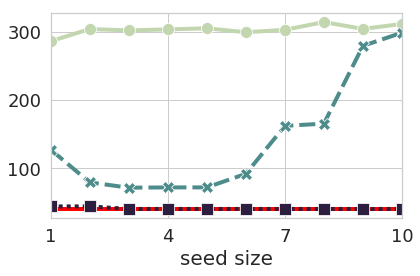

In [ ]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['solution_size'] = (perf_df['C1_size'] + perf_df['C2_size'])

avg_df = perf_df[['seed_size', 'kappa', 'solution_size']].groupby(['seed_size', 'kappa']).mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(inplace=True)

lp = sns.lineplot(
    x='seed_size', y='solution_size', hue='kappa', data=avg_df, ax=ax,
    legend=False,
    **styles
)
lp.set(
    xlim=(1, 10),
#    ylim=(0.5, 1.2),
    xticks=[1, 4, 7, 10],
#    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='',
    xlabel='seed size'
)
fig.tight_layout()
ax.hlines(40, 1, 10, colors='red')
fig.savefig('figs/synthetic_experiment/effect_of_seed_solution_size.pdf')


# the version with error bands

In [ ]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))


fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='eta', y='MAP', hue='kappa', data=perf_df, ax=ax, 
    err_style='band',
    **styles
)

lp.set(
    ylim=(0, 1.1),
    xticks=[0.0, 0.1, 0.2, 0.3],
    yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel='',
    
)
l = lp.legend()

fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta_band.pdf')

In [ ]:
perf_df = pd.read_csv('outputs/effect_of_outlier_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
n_community_nodes = 320
perf_df['frac_nn'] = perf_df['nn'] / (perf_df['nn'] + n_community_nodes)


fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='frac_nn', y='MAP', hue='kappa', data=perf_df, ax=ax,
    legend=False,
    err_style='band',
    **styles
)
ax.set_xlabel('frac. outliers')
lp.set(
    xlim=(0, 0.5),
    ylim=(0, 1.1),
    xticks=[0.0, 0.25, 0.5],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='AP'
)
fig.tight_layout()
fig.savefig('figs/synthetic_experiment/effect_of_outlier_band.pdf')

In [ ]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))

fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='seed_size', y='MAP', hue='kappa', data=perf_df, ax=ax,
    legend=False, 
    err_style='band',
    **styles
)
lp.set(
    xlim=(1, 10),
    ylim=(0, 1.1),
    xticks=[1, 4, 7, 10],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='',
    xlabel='seed size')
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_seed_band.pdf')

In [ ]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']


fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='eta', y='beta_ratio', hue='kappa', data=perf_df, ax=ax, 
    legend=False,
    err_style='band',
    **styles
)

lp.set(
    ylim=(0.5, 1.2),
    xlim=(0, 0.3),
    xticks=[0.0, 0.1, 0.2, 0.3],
    yticks=[0.25, 0.5, 0.75, 1.0],
    xlabel=r'$\eta$',
    ylabel='',
    
)
ax.text(0.12, 1.1, r'$\beta(C_1, C_2) > \beta(C_1^*, C_2^*)$', fontsize=20)
ax.text(0.12, 0.85, r'$\beta(C_1, C_2) < \beta(C_1^*, C_2^*)$', fontsize=20)
ax.hlines(1, 0, 0.3, colors='r')
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_eta_beta_ratio_band.pdf')

In [ ]:
perf_df = pd.read_csv('outputs/effect_of_outlier_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']
n_community_nodes = 320
perf_df['frac_nn'] = perf_df['nn'] / (perf_df['nn'] + n_community_nodes)

fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='frac_nn', y='beta_ratio', hue='kappa', data=perf_df, ax=ax,
    legend=False,
    err_style='band',
    **styles
)
ax.set_xlabel('frac. outliers')
lp.set(
    xlim=(0, 0.5),
    ylim=(0.5, 1.2),
    xticks=[0.0, 0.25, 0.5],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel=r'$\beta(C_1, C_2) / \beta(C_1^*, C_2^*)$'
)
fig.tight_layout()
fig.savefig('figs/synthetic_experiment/effect_of_outlier_beta_ratio_band.pdf')

In [ ]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
perf_df = perf_df[(np.isclose(perf_df['kappa'], 0.1)) | (np.isclose(perf_df['kappa'], 0.5)) | (np.isclose(perf_df['kappa'], 0.9))]
perf_df['kappa'] = perf_df['kappa'].apply(lambda v: "${:.1f}$".format(v))
perf_df['beta_ratio'] = perf_df['min_beta'] / perf_df['ground_truth_beta']

fig, ax = plt.subplots(1, 1)

lp = sns.lineplot(
    x='seed_size', y='beta_ratio', hue='kappa', data=perf_df, ax=ax,
    legend=False,
    err_style='band',
    **styles
)
lp.set(
    xlim=(1, 10),
    ylim=(0.5, 1.2),
    xticks=[1, 4, 7, 10],
    yticks=[0.25, 0.5, 0.75, 1.0],
    ylabel='',
    xlabel='seed size'
)
fig.tight_layout()

fig.savefig('figs/synthetic_experiment/effect_of_seed_beta_ratio_band.pdf')
